In [1]:
# add Matplotlib inline magic command
%matplotlib inline

# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# paths for each data file to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# importing data files with pd read_csv() method and assigning it to a DF variable
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [13]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
sum(city_data_df['type'] == 'Urban')

66

In [8]:
sum(city_data_df['type'] == 'Suburban')

36

In [9]:
sum(city_data_df['type'] == 'Rural')

18

In [10]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
pyber_data_df = pd.merge(ride_data_df,city_data_df, on='city', how='left')

In [20]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [38]:
average_fare = pyber_data_df.groupby(['type']).mean()['fare']

In [39]:
average_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [29]:
average_driver = pyber_data_df.groupby(['type']).mean()['driver_count']

In [30]:
average_driver

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [31]:
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']

In [32]:
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [44]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [45]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [93]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [94]:
total_rural_rides =  rural_cities_df.groupby('city').count()['ride_id']

In [95]:
total_suburban_rides = suburban_cities_df.groupby('city').count()['ride_id']

In [96]:
total_urban_rides = urban_cities_df.groupby('city').count()['ride_id']

In [97]:
average_urban_fare = urban_cities_df.groupby('city').mean()['fare']
average_suburban_fare = suburban_cities_df.groupby('city').mean()['fare']
average_rural_fare = rural_cities_df.groupby('city').mean()['fare']

In [98]:
# Number of Drivers for Each City Type
urban_drivers_count = urban_cities_df.groupby('city').count()['driver_count']
suburban_drivers_count = suburban_cities_df.groupby('city').count()['driver_count']
rural_drivers_count = rural_cities_df.groupby('city').count()['driver_count']

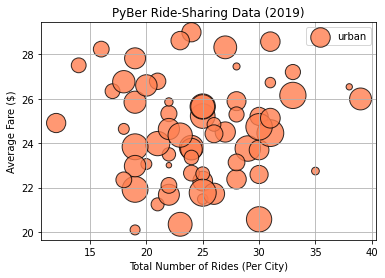

In [99]:
# Build the scatter plots for urban cities.

plt.scatter(total_urban_rides, 
            average_urban_fare, 
            s=10*average_urban_drivers, 
            label='urban',
           color='coral',
           edgecolor="black", 
           linewidths = 1,
           alpha=0.8)

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Add the legend.
plt.legend()

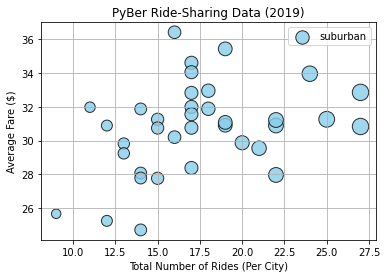

In [100]:
# Build the scatter plots for suburban cities.
plt.scatter(total_suburban_rides, 
            average_suburban_fare, 
            s=10*suburban_drivers_count, 
            label='suburban',
           c='skyblue',
           edgecolor="black", 
           linewidths = 1,
           alpha=0.8)

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Add the legend.
plt.legend()

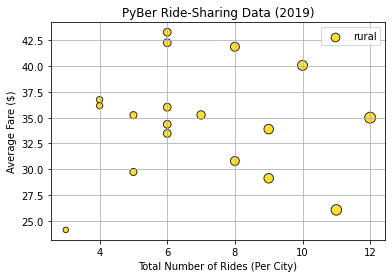

In [101]:
# Build the scatter plots for rural cities.
plt.scatter(total_rural_rides, 
            average_rural_fare, 
            s=10*rural_drivers_count, 
            label='rural',
           c='gold',
           edgecolor="black", 
           linewidths = 1,
           alpha=0.8)

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
# Add the legend.
plt.legend()

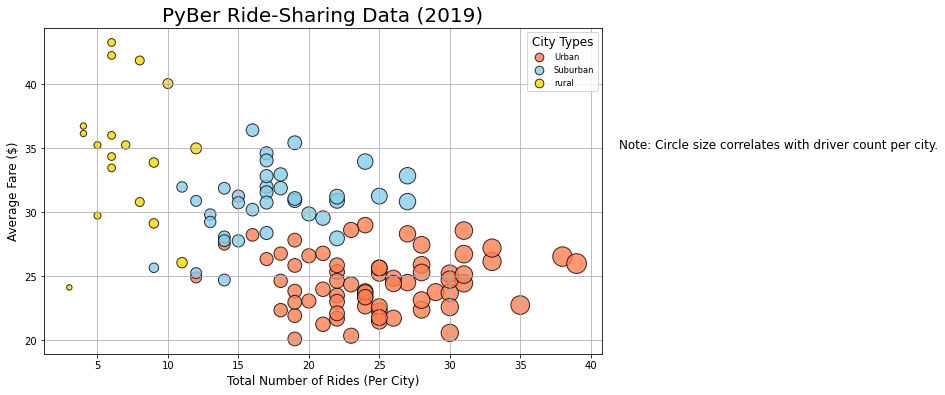

<Figure size 432x288 with 0 Axes>

In [115]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(total_urban_rides,
      average_urban_fare,
      s=10*urban_drivers_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(total_suburban_rides,
      average_suburban_fare,
      s=10*suburban_drivers_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")


plt.scatter(total_rural_rides, 
            average_rural_fare, 
            s=10*rural_drivers_count, 
            label='rural',
           c='gold',
           edgecolor="black", 
           linewidths = 1,
           alpha=0.8)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
plt.savefig("analysis/Fig1.png")